## Imports

In [1]:
import os
import math
import obspy
import pickle
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib.pyplot import figure
from scipy.optimize import curve_fit
from datetime import timedelta
from obspy import UTCDateTime
from obspy.core.event import read_events
from obspy.clients.fdsn import Client

from earthquake import earthquake
import util
import pandas as pd

In [2]:
obspy.__version__

'1.2.2'

## Get set up
Set path to data, and read eq_list (all folders in root folder)

In [3]:
#root = '/home/earthquakes1/homes/Rebecca/phd/data/2019_global_m3/'

Open catalog of events

In [4]:
from obspy.clients.fdsn.mass_downloader import CircularDomain, Restrictions, MassDownloader
from obspy.clients.fdsn import Client

client = Client("IRIS")
dates = ["2019-01-01", "2019-02-01", "2019-03-01", "2019-04-01", "2019-05-01", "2019-06-01", "2019-07-01", "2019-08-01", "2019-09-01", "2019-10-01", "2019-11-01", "2019-12-01"]
cat = client.get_events(starttime=UTCDateTime(dates[0]), endtime=UTCDateTime(dates[1]), includearrivals=True, minmagnitude=3)
print(len(cat))
for d in range(1, len(dates)-1):
    new_cat = client.get_events(starttime=UTCDateTime(dates[d]), endtime=UTCDateTime(dates[d+1]), includearrivals=True, minmagnitude=3)
    print(len(new_cat))
    for event in new_cat:
        cat.append(event)

1250
1140
1193
1175
1076
1199
2045
1015
1191
1290
1342


In [5]:
# client = Client("IRIS")
# cat = client.get_events(starttime=UTCDateTime("2019-01-01"), endtime=UTCDateTime("2020-01-01"), minmagnitude=5, includearrivals=True)
cat = obspy.read_events('/Users/rebecca/Documents/PhD/Research/Frequency/2019_global_m3_catalog.xml')

Not all events had suitable data, look through all events and make a list of ones which have data (eq_with_data) and were successfully picked

In [6]:
#len(cat_with_data)

In [7]:
#cat.plot()


In [8]:
#cat_with_data.plot()

In [9]:
%%script false --no-raise-error
cat[0].magnitudes[0].mag
mags = []
mags_d = []
for e in cat:
    mags.append(e.magnitudes[0].mag)
for e in cat_with_data:
    mags_d.append(e.magnitudes[0].mag)    
plt.hist(mags, np.arange(3, 8, 0.1))
plt.hist(mags_d, np.arange(3, 8, 0.1))
plt.yscale('log')

## the action!!
For all events with data, load the data and then create an earthquake object. work out tp_max and tc, and add to lists (for plotting)

In [10]:
df =  pd.read_pickle('/Users/rebecca/Documents/PhD/Research/Frequency/seismo_det/dataframe.pkl')

In [11]:
df

,magnitude,tpmax,tc
20190131_194949.a,4.20,"[0.536577233006, 0.443124489655, 0.402395198385]","[0.2682018971852354, 0.1908354211956681, 0.319..."
20190131_130953.a,4.90,[5.8435295236],[0.6393567378319965]
20190131_130350.a,4.10,[820.61685423],[0.4349646099634537]
20190131_101656.a,3.09,[7.09948983955],[1.5794069483310673]
20190131_085520.a,3.00,"[1.20694758714, 0.540795298921, 14.2364632491,...","[0.4321685995395488, 0.6982539328416297, 1.188..."
...,...,...,...
20190710_201915.a,4.50,[],[]
20190710_194859.a,3.00,[1.54248363108],[1.2272353069196682]
20190710_194552.a,4.60,[],[]
20190710_145814.a,4.40,[],[]


In [12]:
list_mags = df['magnitude']
list_tpmax = df['tpmax']
list_tc = df['tc']

In [13]:
f = open('/Users/rebecca/Documents/PhD/Research/Frequency/seismo_det/olson_dataset_csv_gr.csv') #'/home/earthquakes1/homes/Rebecca/phd/seismo_det/olson_dataset_csv_gr.csv')
a = f.read()
b = a.split('\n')
c = []
for i in b[1:]:
    if i!='':
        c.append(i.split(','))
m_olsen_gr = []
tp_olsen_gr = []
for j in c:
    if float(j[3]):
        m_olsen_gr.append(float(j[3]))
        tp_olsen_gr.append(math.log(float(j[6]), 10))
f = open('/Users/rebecca/Documents/PhD/Research/Frequency/seismo_det/olson_dataset_csv.csv') #'/home/earthquakes1/homes/Rebecca/phd/seismo_det/olson_dataset_csv_gr.csv')
a = f.read()
b = a.split('\n')
c = []
for i in b[1:]:
    if i!='':
        c.append(i.split(','))
m_olsen = []
tp_olsen = []
for j in c:
    if float(j[3]):
        m_olsen.append(float(j[3]))
        tp_olsen.append(math.log(float(j[6]), 10))

## plotting
### tp and tc subplots
exclude points more than 2 std from the mean at each station. plot individual stations and the median of each station. 

make plot log-log

set up function for scipy line fitting

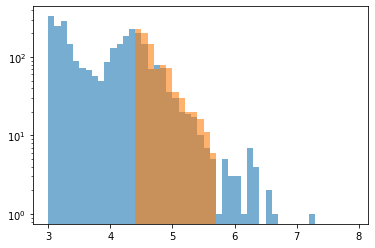

In [53]:
n, bins, patches = plt.hist(list_mags, np.arange(3, 8, 0.1), alpha = 0.6)#np.arange(4.4, 5.8, 0.1))
n, bins, patches = plt.hist(list_mags, np.arange(4.4, 5.8, 0.1), alpha = 0.6)
plt.yscale('log')

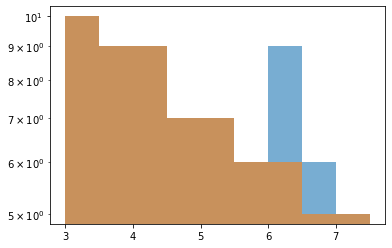

In [54]:
n, bins, patches = plt.hist(m_olsen, np.arange(3, 8, 0.5), alpha = 0.6)
n, bins, patches = plt.hist(m_olsen_gr, np.arange(3, 8, 0.5), alpha = 0.6)
plt.yscale('log')

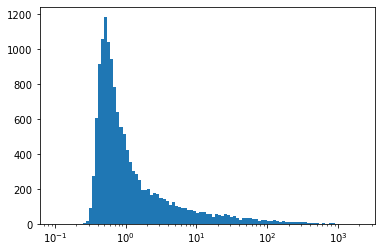

In [16]:
tp_use = []
for i in list_tpmax:
    if i != []:
        for j in i:
            tp_use.append(j)
n, bins, patches = plt.hist(tp_use, np.logspace(-1, 3.3, num=100))
min(tp_use)
max(tp_use)
plt.xscale('log')

In [17]:
max(n)

1185.0

In [18]:
def model_function(x_data, a, b):
    return 10**(a*x_data + b)

In [19]:
def model_function_2(x_data, a, b):
    return a*x_data + b

In [20]:
'''eq_name = '20190131_130350.a'
data = obspy.read(root+eq_name+'/data/*/*')
data.plot()
inv = obspy.read_inventory(root+eq_name+'/station_xml_files/*')
data.remove_response(inv)
data.plot()'''

"eq_name = '20190131_130350.a'\ndata = obspy.read(root+eq_name+'/data/*/*')\ndata.plot()\ninv = obspy.read_inventory(root+eq_name+'/station_xml_files/*')\ndata.remove_response(inv)\ndata.plot()"

plot directly in log space

3
1
1
1
1
1
0
6
0
13
1
1
1
2
1
0
2
103
1
1
1
1
90
1
0
2
1
7
3
1
1
7
1
0
5
3
6
0
1
25
1
4
22
15
1
0
0
12
62
1
2
0
7
2
3
6
1
17
3
0
0
1
1
3
0
1
7
9
14
17
4
2
1
4
1
0
4
4
1
7
4
5
7
0
24
7
0
0
0
1
8
4
3
0
1
3
0
31
30
4
9
3
1
2
29
3
0
0
17
7
1
11
2
15
4
0
1
0
17
1
1
1
1
3
4
6
2
4
4
4
1
4
17
1
1
2
0
11
1
1
5
7
4
0
4
2
3
52
2
5
13
1
0
4
2
1
16
8
48
5
19
0
2
0
16
19
2
49
52
1
1
1
15
0
13
0
0
6
0
2
1
4
0
7
6
1
3
15
17
1
2
1
11
11
8
2
0
0
1
7
1
1
1
1
16
0
1
1
1
2
2
6
0
1
1
2
6
2
1
4
1
1
1
1
1
1
1
10
1
26
1
1
75
6
5
7
1
0
8
1
1
2
3
3
1
2
1
1
0
6
1
6
6
8
2
13
2
7
1
82
2
1
1
4
1
2
1
1
4
0
4
0
1
4
0
9
4
0
1
4
1
1
1
1
2
0
2
1
12
6
2
1
1
1
3
1
1
1
4
2
2
0
7
6
3
0
1
0
6
1
7
16
1
4
1
0
8
0
0
4
3
4
4
0
8
1
1
1
1
105
7
1
1
1
1
2
7
6
10
3
2
1
5
1
12
0
1
21
6
0
2
5
2
2
5
0
5
2
2
1
2
9
1
3
1
7
10
0
1
0
7
17
2
1
0
6
1
1
7
0
3
97
2
69
5
0
2


/Users/rebecca/opt/anaconda3/envs/pandas/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/rebecca/opt/anaconda3/envs/pandas/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/rebecca/opt/anaconda3/envs/pandas/lib/python3.8/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/rebecca/opt/anaconda3/envs/pandas/lib/python3.8/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/Users/rebecca/opt/anaconda3/envs/pandas/lib/python3.8/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret 

1
3
4
10
1
2
4
16
2
3
1
2
1
2
5
6
0
4
0
2
1
2
1
1
2
1
1
1
1
0
0
1
1
2
2
0
26
1
3
3
0
2
1
1
1
4
1
1
2
1
1
26
1
0
0
0
0
4
5
0
4
2
2
2
0
8
4
6
5
0
1
11
3
1
2
1
3
0
5
1
0
2
1
0
5
1
2
8
1
1
9
7
3
0
1
1
39
13
5
16
1
1
1
4
6
9
0
9
0
1
7
3
1
1
0
2
4
2
1
4
1
1
1
0
4
0
1
1
0
1
14
2
25
15
18
0
1
15
4
1
3
13
10
2
3
1
1
4
8
0
0
1
5
1
14
0
1
1
0
2
104
1
2
0
1
2
2
2
0
1
1
1
1
1
0
1
3
1
1
2
1
2
1
1
8
1
0
1
2
1
1
1
4
30
30
11
0
3
10
1
0
0
0
1
18
6
7
7
10
1
0
1
1
1
0
1
0
1
0
3
1
0
0
0
4
2
1
0
1
1
0
1
0
1
7
0
12
1
2
1
1
0
8
9
2
1
1
1
1
2
6
6
6
6
0
2
1
8
8
1
0
10
1
0
6
1
6
1
1
1
5
4
2
1
4
3
6
6
1
2
2
1
1
0
2
6
1
1
14
4
27
5
3
1
3
27
0
2
0
2
1
1
18
3
0
11
2
3
2
1
1
6
1
1
1
1
0
0
2
2
2
8
1
2
1
2
2
1
5
2
2
10
2
2
1
1
1
1
1
0
1
2
2
0
2
2
3
2
2
2
2
1
1
2
0
3
0
6
2
1
2
6
3
0
1
0
1
1
3
3
3
5
1
1
5
6
1
1
3
2
1
26
1
8
9
2
4
1
2
3
4
8
6
1
1
1
27
11
13
2
1
1
0
0
1
1
1
0
1
15
3
8
9
1
0
1
1
1
3
5
9
3
3
27
13
1
1
2
1
7
2
3
28
0
1
2
0
3
1
3
4
0
1
2
4
1
8
104
3
1
0
7
0
28
9
2
1
2
3
1
10
3
0
1
1
3
3
1
2
2
2
0
1
0
4
26
1
0

/Users/rebecca/opt/anaconda3/envs/pandas/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/rebecca/opt/anaconda3/envs/pandas/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/rebecca/opt/anaconda3/envs/pandas/lib/python3.8/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/rebecca/opt/anaconda3/envs/pandas/lib/python3.8/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/Users/rebecca/opt/anaconda3/envs/pandas/lib/python3.8/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret 

1
0
5
3
6
0
1
25
1
4
15
1
0
12
62
1
2
0
7
2
3
6
1
17
3
1
1
3
0
1
9
14
17
4
2
1
4
1
0
4
4
1
7
4
5
7
0
7
0
0
1
8
4
3
0
1
3
31
30
4
9
3
1
2
29
3
0
0
17
7
1
11
2
15
4
0
1
0
17
1
1
1
1
3
4
6
2
4
4
4
1
4
17
1
1
2
0
11
5
7
4
0
4
52
2
1
0
4
1
16
8
5
19
0
2
0
16
19
2
49
52
1
1
1
15
0
0
6
0
2
1
4
0
7
6
1
3
15
17
1
2
1
11
11
8
2
0
1
7
1
1
1
1
16
0
1
1
1
2
2
6
0
1
1
2
6
4
1
1
1
1
1
1
10
26
1
1
75
6
5
7
1
0
8
1
1
2
3
3
1
2
1
1
0
1
6
6
8
2
13
7
1
2
1
4
1
2
1
1
4
0
4
1
4
0
9
0
1
4
1
1
1
2
0
2
1
2
1
1
1
3
1
1
1
2
7
6
3
0
1
0
6
1
7
16
1
4
1
0
8
0
0
4
3
4
4
0
8
1
1
1
7
1
1
1
1
2
7
3
1
5
1
12
0
1
21
6
0
2
5
2
2
5
0
5
2
2
1
2
9
1
3
1
7
0
1
0
7
17
2
1
0
6
1
1
7
0
3
97
2
69
5
0
2
1
3
4
1
4
16
2
3
1
2
1
2
5
0
4
2
1
2
1
1
2
1
1
1
0
0
1
1
2
2
0
1
3
3
0
2
1
1
1
4
1
1
2
1
1
26
1
0
0
0
4
0
4
2
2
2
0
8
4
6
5
0
1
11
1
2
1
3
0
5
1
0
2
1
0
5
1
2
8
1
1
9
7
3
0
1
1
39
5
1
1
1
6
9
0
0
1
7
3
1
0
2
2
1
4
1
1
1
0
4
0
1
1
0
1
2
25
15
18
0
15
4
1
3
13
10
2
3
1
1
4
8
0
1
5
1
14
1
0
2
104
1
0
1
2
2
2
0
1
1
1
1
1
0
1
3
1
1
2
2


/Users/rebecca/opt/anaconda3/envs/pandas/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/rebecca/opt/anaconda3/envs/pandas/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/rebecca/opt/anaconda3/envs/pandas/lib/python3.8/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/rebecca/opt/anaconda3/envs/pandas/lib/python3.8/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/Users/rebecca/opt/anaconda3/envs/pandas/lib/python3.8/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret 

1
1
1
1
90
1
0
2
3
1
1
7
1
5
3
6
0
1
25
1
4
15
1
0
12
62
1
2
0
7
2
3
6
1
17
3
1
3
0
1
9
14
17
4
2
1
4
1
4
4
1
7
4
5
0
7
0
0
1
8
4
3
0
1
3
31
30
4
9
3
1
3
0
0
17
7
1
11
15
0
1
0
17
1
1
1
4
6
2
4
4
4
1
4
17
1
1
2
0
11
5
7
4
0
4
52
2
1
0
4
1
16
8
19
0
2
0
16
19
2
52
1
1
15
0
0
6
2
1
0
7
6
1
3
17
1
2
1
11
11
8
2
7
1
1
1
1
16
0
1
1
1
2
2
6
0
1
1
2
6
4
1
1
1
1
1
1
10
26
1
1
6
5
7
1
0
8
1
1
2
3
3
1
2
1
1
0
1
6
6
8
2
13
7
1
1
4
1
2
1
4
0
4
1
4
0
9
0
1
4
1
1
1
2
0
2
1
2
1
1
1
3
1
1
1
3
0
1
0
6
1
7
16
1
4
1
0
8
0
0
4
3
4
4
0
8
1
1
1
1
1
1
1
2
7
3
1
5
0
1
21
6
0
2
5
2
2
5
0
5
2
2
1
2
9
1
3
1
7
0
1
0
7
17
2
1
0
1
1
7
0
3
97
2
5
0
2
1
3
4
1
4
2
3
1
2
1
2
5
0
4
2
1
2
1
1
2
1
1
1
0
0
1
1
2
2
0
1
3
3
0
2
1
1
1
4
1
2
1
1
1
0
0
0
4
0
4
2
2
2
0
8
4
5
0
1
11
1
2
1
3
0
5
1
0
2
1
0
5
1
2
8
1
9
7
3
0
1
1
39
5
1
1
1
6
9
0
0
1
7
3
1
0
2
2
1
4
1
1
0
4
0
1
1
1
2
25
18
0
15
4
1
3
13
2
3
1
1
4
8
0
5
1
14
1
0
2
104
1
0
1
2
2
0
1
1
1
1
1
0
1
3
1
1
2
2
1
1
8
0
2
1
1
1
4
30
30
11
0
3
1
0
0
0
18
7
7
10
0
1
1
1
1
0
1
0


/Users/rebecca/opt/anaconda3/envs/pandas/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/rebecca/opt/anaconda3/envs/pandas/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/rebecca/opt/anaconda3/envs/pandas/lib/python3.8/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/rebecca/opt/anaconda3/envs/pandas/lib/python3.8/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/Users/rebecca/opt/anaconda3/envs/pandas/lib/python3.8/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret 


11
8
2
7
1
1
1
1
16
0
1
1
1
2
2
6
0
1
1
2
6
4
1
1
1
1
1
1
1
1
6
5
7
1
0
8
1
1
2
3
1
2
1
1
0
1
6
8
13
7
1
1
4
1
2
1
4
0
4
4
0
9
0
1
4
1
1
2
2
1
2
1
1
3
1
1
1
3
0
1
0
6
1
7
16
1
4
1
0
8
0
0
4
3
4
4
0
8
1
1
1
1
1
1
1
2
7
1
5
0
1
21
6
0
2
5
2
5
0
5
2
2
1
2
9
1
3
1
7
0
1
0
7
17
1
0
1
7
0
3
2
5
0
2
3
4
1
4
2
3
1
2
1
2
5
0
4
2
1
2
1
1
2
1
1
0
1
1
2
2
0
1
3
3
0
2
1
4
1
2
1
1
1
0
0
0
4
0
4
2
0
8
4
5
0
1
11
2
1
3
0
5
1
0
2
1
0
1
8
1
9
7
3
0
39
5
1
1
1
6
9
0
0
7
0
2
2
1
4
1
1
0
4
0
1
1
1
2
18
0
1
3
13
2
3
1
1
4
8
0
5
1
14
1
0
2
104
1
0
1
2
2
0
1
1
1
1
1
0
1
3
1
1
2
2
1
1
8
0
2
1
1
1
4
30
30
11
0
3
1
0
7
7
10
0
1
1
1
0
0
4
2
1
0
1
0
1
7
12
1
9
2
1
1
1
6
6
6
2
1
8
8
10
1
0
6
1
1
1
4
2
4
6
2
2
1
2
1
14
4
27
5
3
1
3
0
0
2
18
3
0
11
1
1
1
1
1
0
0
8
1
1
2
5
2
10
2
1
1
1
1
2
0
2
2
3
2
2
2
2
1
3
0
2
2
3
0
1
0
1
1
3
3
5
1
1
5
1
1
3
1
1
2
4
2
3
4
6
1
27
2
1
1
1
0
1
3
9
1
1
1
1
3
5
3
3
1
1
2
7
2
3
1
2
0
3
3
4
0
2
4
1
3
1
0
0
9
2
2
3
1
10
3
0
1
1
3
3
1
2
2
0
1
0
4
1
0
0
1
1
1
3
1
3
14
0
0
3
0
4
5
1
1
24
2
0

/Users/rebecca/opt/anaconda3/envs/pandas/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/rebecca/opt/anaconda3/envs/pandas/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/rebecca/opt/anaconda3/envs/pandas/lib/python3.8/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/rebecca/opt/anaconda3/envs/pandas/lib/python3.8/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/Users/rebecca/opt/anaconda3/envs/pandas/lib/python3.8/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret 


2
1
2
1
3
1
1
1
3
0
1
0
6
1
7
16
1
4
0
8
0
0
4
3
4
4
0
8
1
1
1
1
1
1
1
2
7
1
5
0
21
6
0
2
5
5
0
5
2
2
1
2
9
1
3
1
7
0
1
0
7
1
1
7
0
3
2
5
2
3
4
1
4
2
3
1
2
1
2
5
0
4
2
1
2
1
1
2
1
1
0
1
2
2
0
1
0
1
4
1
2
1
1
1
0
0
0
4
0
4
2
0
8
4
5
0
1
11
2
1
3
0
5
1
0
2
1
0
1
8
1
7
3
0
5
1
1
1
6
9
0
0
7
2
2
1
4
1
1
0
4
1
1
1
2
0
1
3
13
2
3
1
1
4
8
0
5
1
14
0
2
1
0
2
2
0
1
1
1
1
1
0
1
3
1
1
2
2
1
1
8
0
2
1
1
1
4
30
30
11
3
1
0
7
7
10
0
1
1
1
0
4
1
1
7
12
1
9
2
1
1
1
6
6
6
2
1
8
10
1
0
6
1
1
1
4
6
2
2
1
2
1
14
4
5
3
1
3
0
0
2
18
3
0
11
1
1
1
1
0
0
8
1
1
5
2
10
2
1
1
1
1
2
0
2
2
3
2
2
2
2
1
3
0
2
2
3
0
1
0
1
1
3
3
5
1
1
5
1
1
3
1
1
2
4
2
3
4
6
1
27
2
1
1
1
0
1
3
1
1
1
3
5
3
3
1
1
2
7
2
3
1
2
0
3
3
4
0
2
4
1
3
1
0
0
9
2
3
10
3
0
1
1
3
3
1
2
2
0
1
0
4
1
0
0
1
1
1
3
1
3
0
0
3
0
4
5
1
1
24
0
4
2
3
2
2
9
0
1
14
20
2
4
4
12
1
1
1
13
1
1
6
1
4
1
3
4
3
1
1
0
2
4
0
3
2
1
1
1
2
10
0
3
3
0
4
1
2
0
21
1
1
2
1
1
4
18
11
1
7
7
0
1
1
1
8
8
2
0
0
1
3
1
1
2
0
0
10
0
1
1
2
3
3
7
11
1
5
6
0
3
1
1
1
2
1
2
0
2
2
1
4
2
3
26


/Users/rebecca/opt/anaconda3/envs/pandas/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/rebecca/opt/anaconda3/envs/pandas/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/rebecca/opt/anaconda3/envs/pandas/lib/python3.8/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/rebecca/opt/anaconda3/envs/pandas/lib/python3.8/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/Users/rebecca/opt/anaconda3/envs/pandas/lib/python3.8/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret 

1
2
2
1
1
0
2
1
1
1
4
30
3
1
0
7
7
10
0
1
1
1
0
4
1
12
1
9
2
1
1
1
6
6
2
1
8
10
1
0
6
1
1
1
4
6
2
2
1
2
1
14
4
5
3
1
3
0
0
2
18
0
11
1
1
1
1
0
0
8
1
1
5
2
10
2
1
1
1
1
2
0
2
2
3
2
2
1
3
0
2
3
0
1
0
1
3
3
5
1
1
5
1
1
3
1
1
2
4
2
3
4
6
1
2
1
1
1
0
1
3
1
1
1
3
5
3
3
1
1
2
7
2
3
1
2
0
3
4
0
2
1
3
1
0
0
9
2
3
10
3
0
1
1
3
3
1
2
2
0
1
0
4
1
0
0
1
1
1
3
1
3
0
0
3
0
4
5
1
1
24
0
4
2
3
2
2
9
0
1
14
20
2
4
4
12
1
1
1
13
1
1
6
1
4
1
3
4
3
1
1
0
2
4
0
2
1
1
1
2
10
0
3
3
0
4
1
2
0
21
1
1
2
1
4
18
11
1
7
7
0
1
1
1
8
8
2
0
0
1
3
1
1
2
0
0
0
1
1
3
3
7
11
1
5
6
0
3
1
1
1
2
1
2
0
2
1
4
2
3
26
1
8
6
4
1
1
6
0
12
1
1
2
2
4
3
1
2
1
3
1
0
12
2
0
12
2
5
4
2
2
2
3
0
36
0
4
0
13
2
9
11
0
0
1
4
1
0
4
1
3
2
1
5
5
0
2
0
0
1
3
1
1
0
1
2
2
1
2
2
1
5
1
2
10
5
3
1
6
9
1
1
17
3
0
1
4
22
2
1
3
4
1
0
4
4
1
3
15
1
4
17
0
4
1
4
4
1
4
0
4
0
3
1
4
1
1
1
0
1
1
1
3
0
1
1
1
1
0
1
0
4
0
5
2
1
2
3
5
3
1
0
2
4
0
2
2
3
1
1
4
1
4
14
3
14
5
0
71
0
4
1
3
1
1
1
7
0
0
1
5
0
9
4
0
0
0
4
3
0
0
4
0
3
0
10
0
5
0
5
5
0
0
3
0
0
1
0
0
2
1
6
0

/Users/rebecca/opt/anaconda3/envs/pandas/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/rebecca/opt/anaconda3/envs/pandas/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/rebecca/opt/anaconda3/envs/pandas/lib/python3.8/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/rebecca/opt/anaconda3/envs/pandas/lib/python3.8/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/Users/rebecca/opt/anaconda3/envs/pandas/lib/python3.8/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret 


5
2
2
1
2
9
1
3
1
0
1
0
7
1
1
7
0
3
2
5
2
3
4
1
4
2
3
1
2
1
2
0
4
2
1
2
1
1
1
1
0
1
2
2
0
1
1
4
1
2
1
1
1
0
0
0
4
0
4
2
0
8
4
5
0
1
11
1
3
0
5
1
0
2
1
0
1
8
1
7
3
5
1
1
6
9
0
0
7
2
1
4
1
1
4
1
1
1
2
0
1
3
2
3
1
1
4
8
0
5
1
14
0
2
0
2
0
1
1
1
1
1
0
1
1
1
2
1
1
2
1
1
1
4
30
3
1
0
7
7
10
0
1
1
1
0
4
1
12
1
9
2
1
1
1
6
6
2
1
8
10
1
0
6
1
1
1
4
6
2
2
1
2
1
14
4
5
3
1
3
0
0
2
18
0
11
1
1
1
1
0
0
8
1
1
5
2
2
1
1
1
0
2
3
2
2
1
3
0
2
3
0
1
0
1
3
3
5
1
1
5
1
1
3
1
1
2
4
2
3
4
6
1
2
1
1
1
0
1
3
1
1
1
3
5
3
3
1
1
2
7
3
1
2
0
3
4
2
1
3
1
0
0
9
2
3
10
3
0
1
1
3
3
1
2
2
0
1
0
4
1
0
0
1
1
3
1
3
0
0
3
0
4
5
1
1
24
0
4
2
3
2
9
0
1
14
20
2
4
4
12
1
1
13
1
1
1
4
1
3
3
1
1
0
2
4
0
2
1
1
1
2
10
0
3
3
0
4
1
2
0
21
1
1
2
1
4
18
1
7
7
0
1
1
1
8
8
2
0
0
1
3
1
2
0
0
0
1
1
3
3
7
11
1
5
6
0
3
1
1
2
1
2
0
2
1
4
2
3
26
1
8
6
4
1
1
6
0
12
1
1
2
2
4
1
2
1
3
1
0
12
2
0
12
2
5
4
2
2
2
3
0
36
0
4
0
13
2
11
0
0
1
4
1
0
4
1
3
2
1
5
5
0
2
0
0
1
3
1
0
1
2
1
2
2
1
5
1
2
10
5
3
1
6
9
1
1
17
3
0
1
4
22
2
1
3
4
1
0
4
4
1
3
15
1

/Users/rebecca/opt/anaconda3/envs/pandas/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/rebecca/opt/anaconda3/envs/pandas/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/rebecca/opt/anaconda3/envs/pandas/lib/python3.8/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/rebecca/opt/anaconda3/envs/pandas/lib/python3.8/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/Users/rebecca/opt/anaconda3/envs/pandas/lib/python3.8/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret 

3
1
1
1
3
6
0
1
1
1
0
12
1
2
0
7
2
3
1
17
1
3
0
1
4
2
1
1
4
4
1
7
4
0
7
1
8
4
3
0
1
3
9
1
3
0
0
17
7
1
11
0
1
1
4
6
2
4
4
4
1
4
17
1
1
2
0
5
7
4
0
4
2
1
0
4
1
8
2
0
16
2
52
1
1
0
6
2
6
1
3
17
1
2
11
8
2
1
1
1
1
0
1
2
2
6
0
1
1
2
6
4
1
1
1
1
1
1
1
6
7
1
0
8
1
2
3
1
2
1
1
0
6
8
13
1
1
4
2
1
0
4
0
1
4
1
1
2
2
1
2
3
1
1
3
0
1
0
1
7
16
1
4
0
0
4
4
4
0
1
1
1
1
1
2
7
1
5
0
21
0
2
5
0
5
2
2
1
2
9
1
3
1
0
1
0
7
1
1
7
0
3
2
5
2
3
4
1
4
3
1
2
1
2
0
4
2
1
2
1
1
1
1
0
1
2
2
0
1
4
1
2
1
1
1
0
0
0
4
0
4
2
0
8
4
5
0
1
11
1
3
0
5
1
0
2
1
0
1
8
1
7
3
1
1
6
9
0
0
7
2
1
4
1
4
1
1
1
2
0
1
3
2
3
1
1
4
0
5
1
14
0
2
0
2
0
1
1
1
1
1
0
1
1
1
2
1
1
2
1
1
1
4
30
3
1
0
7
7
10
0
1
1
1
0
4
1
12
1
9
2
1
1
1
6
6
2
1
10
1
0
1
1
1
4
6
2
2
1
2
1
14
4
5
3
1
3
0
0
2
18
0
1
1
1
1
0
0
8
1
1
5
2
2
1
1
1
0
3
2
1
3
0
2
3
0
1
0
1
3
3
5
1
1
5
1
1
3
1
1
2
4
2
4
6
1
2
1
1
1
0
1
3
1
1
1
3
5
3
3
1
1
2
3
1
2
0
3
4
2
1
3
1
0
0
9
2
3
10
3
0
1
1
3
3
1
2
2
0
1
0
4
1
0
1
1
3
1
3
0
0
3
0
4
1
1
24
0
4
2
3
2
9
0
1
14
20
2
4
4
12
1
1
13
1
1
1


/Users/rebecca/opt/anaconda3/envs/pandas/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/rebecca/opt/anaconda3/envs/pandas/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/rebecca/opt/anaconda3/envs/pandas/lib/python3.8/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/rebecca/opt/anaconda3/envs/pandas/lib/python3.8/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/Users/rebecca/opt/anaconda3/envs/pandas/lib/python3.8/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret 

0
5
1
14
0
2
0
2
0
1
1
1
1
0
1
1
1
2
1
1
2
1
1
1
4
30
3
1
0
7
10
0
1
1
1
0
4
1
12
1
9
2
1
1
1
6
6
1
10
1
0
1
1
4
6
2
2
1
2
1
14
4
5
3
1
3
0
0
2
18
0
1
1
1
1
0
0
8
1
1
5
2
2
1
1
1
0
3
2
1
3
0
2
3
0
1
0
1
3
3
5
1
1
5
1
1
3
1
1
2
4
2
4
6
1
2
1
1
1
0
1
3
1
1
1
3
3
3
1
1
2
3
1
2
0
3
4
2
1
3
1
0
0
9
2
3
10
3
0
1
1
3
3
2
2
0
1
0
4
1
0
1
1
3
1
3
0
0
3
0
4
1
1
24
0
4
2
3
2
9
0
1
14
20
2
4
4
12
1
1
13
1
1
1
1
3
3
1
1
0
2
4
0
2
1
1
2
10
0
3
3
0
4
1
2
0
21
1
1
2
4
18
7
0
1
1
1
8
2
0
1
3
1
2
0
0
0
1
1
3
3
7
1
5
6
0
3
1
1
2
1
2
0
2
1
4
2
3
26
1
8
6
4
1
1
6
0
12
1
1
2
2
4
1
2
1
3
1
0
12
2
0
2
5
4
2
2
3
0
0
4
0
13
2
0
0
1
4
1
0
4
3
2
1
5
5
0
2
0
0
1
3
0
1
2
1
2
1
5
1
2
10
5
3
1
6
9
1
1
17
0
1
4
22
2
1
3
4
1
4
4
1
3
15
4
17
0
4
1
4
4
4
0
4
0
3
1
4
1
1
1
0
1
1
1
3
0
1
1
1
1
0
1
0
4
0
5
2
1
2
3
5
3
1
0
2
4
0
2
2
3
4
1
4
14
3
5
0
0
4
1
3
1
1
1
7
0
0
1
5
0
4
0
0
0
4
3
0
0
4
0
3
0
10
0
5
0
5
5
0
0
3
0
0
0
0
2
1
0
1
3
1
1
0
0
0
4
1
0
10
5
4
0
1
1
1
0
9
1
1
1
1
2
2
0
0
3
4
0
0
6
5
1
4
5
0
4
0
0
15
0
1
0
0
0
3

/Users/rebecca/opt/anaconda3/envs/pandas/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/rebecca/opt/anaconda3/envs/pandas/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/rebecca/opt/anaconda3/envs/pandas/lib/python3.8/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/rebecca/opt/anaconda3/envs/pandas/lib/python3.8/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/Users/rebecca/opt/anaconda3/envs/pandas/lib/python3.8/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret 

8
4
3
0
1
3
9
1
3
0
0
17
7
1
11
0
1
1
4
6
2
4
4
4
1
4
17
1
1
2
0
5
7
4
0
4
2
1
0
4
1
8
2
0
16
2
1
0
6
2
6
1
3
1
2
11
8
2
1
1
1
0
1
2
2
6
0
1
1
2
6
4
1
1
1
1
1
1
1
6
1
0
8
1
2
3
1
1
0
6
8
13
1
1
4
2
1
0
4
0
1
4
1
1
2
2
1
2
3
1
1
3
0
1
0
1
7
1
4
0
0
4
4
4
0
1
1
1
1
1
2
7
1
5
0
21
0
2
5
5
2
2
1
2
9
1
3
1
0
1
0
1
1
0
3
2
5
2
3
4
1
4
3
1
2
1
2
4
2
1
2
1
1
1
1
0
1
2
2
0
1
4
1
2
1
1
1
0
0
0
4
0
4
2
0
8
4
5
0
1
1
3
0
5
1
0
2
1
0
1
8
1
7
3
1
1
6
0
0
7
2
1
4
1
4
1
1
1
2
0
3
2
3
1
1
4
0
5
1
14
0
2
0
2
0
1
1
1
1
0
1
1
1
2
1
1
2
1
1
1
4
30
3
1
0
7
10
0
1
1
1
0
4
1
12
1
9
2
1
1
1
6
6
1
10
1
0
1
1
4
6
2
2
1
2
1
14
4
3
1
3
0
0
2
18
0
1
1
1
1
0
0
8
1
1
5
2
2
1
1
1
0
3
2
1
3
0
2
3
0
1
0
1
3
3
5
1
1
5
1
1
3
1
1
2
4
2
4
6
1
1
1
1
0
1
3
1
1
1
3
3
3
1
1
2
3
1
2
0
3
4
2
1
3
1
0
0
9
2
3
10
3
0
1
1
3
3
2
0
1
0
4
1
0
1
1
1
3
0
0
3
0
4
1
1
24
0
4
2
3
2
9
0
1
14
20
2
4
4
12
1
1
13
1
1
1
1
3
1
1
0
2
4
0
2
1
1
2
10
0
3
3
0
4
1
2
0
21
1
1
2
4
18
7
0
1
1
1
2
0
1
3
1
2
0
0
0
1
1
3
3
7
1
5
6
0
3
1
1
2
1
0
1
4
2
3
26
1


/Users/rebecca/opt/anaconda3/envs/pandas/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/rebecca/opt/anaconda3/envs/pandas/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/rebecca/opt/anaconda3/envs/pandas/lib/python3.8/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/rebecca/opt/anaconda3/envs/pandas/lib/python3.8/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/Users/rebecca/opt/anaconda3/envs/pandas/lib/python3.8/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret 


1
0
1
7
1
4
0
4
4
4
0
1
1
1
1
2
7
5
0
21
0
2
5
5
2
2
1
2
9
1
3
1
0
1
0
1
1
0
3
2
5
3
4
1
4
3
1
2
1
2
4
2
1
2
1
1
1
0
1
2
2
0
1
4
1
2
1
1
1
0
0
4
0
4
2
0
8
4
5
0
1
1
3
0
5
1
0
2
1
0
1
8
1
7
3
1
6
0
0
7
2
1
4
1
4
1
1
1
2
0
3
2
3
1
4
0
5
1
14
0
2
0
2
0
1
1
1
1
0
1
1
2
1
1
2
1
1
1
4
3
1
0
7
10
0
1
1
1
0
4
1
12
9
2
1
1
1
6
6
1
10
1
0
1
1
4
6
2
2
1
2
1
14
4
1
3
0
2
18
0
1
1
1
1
0
0
8
1
1
2
2
1
1
1
0
3
2
1
3
0
2
3
0
1
0
1
3
3
1
1
5
1
1
3
1
1
2
4
2
4
6
1
1
1
1
0
1
3
1
1
1
3
3
3
1
1
2
3
1
2
0
3
2
1
3
1
0
9
2
10
3
1
3
3
2
0
1
0
4
1
0
1
1
1
3
0
0
0
4
1
1
24
0
4
2
3
2
9
0
1
14
20
2
4
4
12
1
1
13
1
1
1
1
3
1
1
2
4
0
2
1
1
2
10
0
3
3
0
4
1
2
0
21
1
1
2
4
7
0
1
1
1
2
0
1
3
2
0
0
1
1
3
3
7
1
5
6
0
3
1
1
2
1
0
1
2
3
26
1
8
6
1
1
6
0
12
1
1
2
2
4
1
2
1
3
1
0
12
2
0
5
4
2
2
3
0
0
4
0
13
2
0
0
1
4
1
0
4
3
2
1
5
5
0
2
0
0
1
3
1
2
1
2
1
5
1
2
3
1
9
1
1
17
0
1
4
22
2
1
4
1
4
4
1
3
15
17
0
1
4
4
4
4
0
1
1
1
1
1
1
1
3
0
1
1
1
1
0
1
0
4
0
5
2
1
2
5
3
1
0
2
4
0
2
2
3
4
1
4
14
5
0
0
4
1
3
1
1
1
7
0
0
1
5
0
4
0
0

/Users/rebecca/opt/anaconda3/envs/pandas/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/rebecca/opt/anaconda3/envs/pandas/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/rebecca/opt/anaconda3/envs/pandas/lib/python3.8/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/rebecca/opt/anaconda3/envs/pandas/lib/python3.8/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/Users/rebecca/opt/anaconda3/envs/pandas/lib/python3.8/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret 

0
1
2
1
1
1
2
3
1
1
3
6
0
1
1
1
0
12
1
2
0
3
1
17
1
3
4
2
1
1
4
4
1
0
7
8
4
3
0
1
3
9
1
3
0
17
7
1
11
0
1
1
6
2
4
4
4
1
1
2
0
5
7
4
0
2
1
0
4
1
8
2
0
16
2
1
0
2
1
3
1
2
11
8
2
1
1
0
1
2
2
6
0
1
1
6
4
1
1
1
1
1
1
1
6
1
8
2
3
1
1
0
8
1
1
4
2
1
0
4
0
1
1
1
2
2
1
2
3
1
1
3
0
1
0
1
7
1
4
0
4
4
4
0
1
1
2
7
5
0
21
0
2
5
5
1
2
9
1
3
1
0
1
0
1
1
0
2
5
3
4
1
4
3
1
2
1
2
4
2
1
0
1
2
0
1
4
2
1
0
0
4
2
0
8
4
5
0
1
1
3
0
1
0
2
1
0
1
8
7
3
1
0
0
7
2
1
4
1
4
1
1
2
0
3
2
3
1
0
1
14
0
2
0
2
0
1
1
1
0
1
1
2
1
1
1
1
1
4
3
1
0
7
10
0
1
1
1
0
4
1
12
9
2
1
1
1
6
6
1
10
1
0
1
4
6
2
2
1
2
1
14
4
1
3
2
18
0
1
1
0
0
8
1
1
2
1
1
1
3
2
1
3
0
2
3
0
1
1
3
1
1
5
1
1
3
1
2
4
2
4
1
1
1
1
0
1
3
1
1
1
3
3
3
1
1
2
3
1
2
0
3
2
1
1
0
9
2
10
3
1
3
3
2
0
1
0
4
1
0
1
1
1
3
0
0
0
4
1
1
24
0
4
3
2
9
0
1
14
2
4
4
12
1
1
13
1
1
1
1
3
1
2
4
2
1
1
2
10
0
3
3
0
4
1
2
0
21
1
2
4
7
0
1
1
1
2
0
1
3
2
0
0
1
1
3
3
7
1
5
6
0
3
2
1
0
1
2
3
26
1
6
1
1
6
0
12
1
1
4
1
2
1
3
1
0
12
2
0
5
4
2
3
0
0
0
13
2
0
0
1
0
4
3
2
5
5
0
2
0
0
3
1
2
1
2
1
5


/Users/rebecca/opt/anaconda3/envs/pandas/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/rebecca/opt/anaconda3/envs/pandas/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/rebecca/opt/anaconda3/envs/pandas/lib/python3.8/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/rebecca/opt/anaconda3/envs/pandas/lib/python3.8/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/Users/rebecca/opt/anaconda3/envs/pandas/lib/python3.8/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret 

1
1
1
2
3
1
1
3
6
0
1
1
1
0
12
1
2
0
1
17
1
3
4
2
1
4
1
0
7
8
4
3
0
1
3
9
1
3
0
17
7
11
1
1
6
2
4
4
4
1
1
0
5
7
4
0
2
1
4
8
2
1
0
2
1
2
11
8
2
1
1
0
1
2
2
6
0
1
1
4
1
1
1
1
1
6
1
8
2
3
1
1
0
8
1
4
2
1
0
4
0
1
1
1
2
2
1
2
3
1
1
3
0
1
1
7
1
4
0
4
4
4
0
1
1
5
0
21
2
5
5
1
2
9
1
3
1
0
1
0
1
1
2
5
3
4
4
3
2
1
2
4
2
1
0
1
0
1
4
2
1
0
4
2
0
8
4
5
0
1
1
3
0
1
0
2
1
0
1
8
7
3
1
0
2
4
1
4
1
1
2
0
3
3
1
0
14
0
2
0
2
0
1
0
1
1
2
1
1
1
1
1
4
1
0
10
0
1
1
0
4
1
12
9
2
1
1
1
6
1
10
1
1
4
6
2
2
1
2
1
14
4
1
3
2
18
0
1
1
0
0
1
2
1
1
3
2
1
3
0
2
3
1
3
1
1
5
1
1
3
1
2
4
2
4
1
1
1
1
0
1
3
1
1
1
3
3
1
1
2
3
1
2
0
3
1
1
0
9
2
10
3
1
3
2
0
1
0
1
1
1
0
0
0
4
1
24
0
4
3
2
9
0
1
14
2
4
4
1
1
13
1
1
1
3
1
2
4
2
1
1
2
10
0
3
3
0
4
1
2
0
21
1
2
4
7
0
1
1
2
0
1
2
0
0
1
1
3
3
7
1
5
6
0
3
2
1
0
1
2
3
26
6
1
1
6
0
12
1
1
4
1
2
1
3
1
0
12
2
0
5
4
2
3
0
0
0
13
2
0
0
1
0
4
3
2
5
5
0
2
0
0
3
2
1
2
1
5
1
3
1
1
1
17
0
4
22
1
4
1
4
4
1
3
15
17
0
1
4
4
4
4
0
1
1
1
1
1
1
3
0
1
1
1
1
4
0
5
2
1
5
0
2
4
0
2
2
3
4
1
4
0
0
4
3
1
1


/Users/rebecca/opt/anaconda3/envs/pandas/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/rebecca/opt/anaconda3/envs/pandas/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/rebecca/opt/anaconda3/envs/pandas/lib/python3.8/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/rebecca/opt/anaconda3/envs/pandas/lib/python3.8/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/Users/rebecca/opt/anaconda3/envs/pandas/lib/python3.8/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret 

5
3
4
3
2
1
2
2
1
0
1
1
4
2
1
0
4
2
0
8
4
5
0
1
3
0
1
2
1
0
1
8
7
3
1
2
4
1
4
1
2
0
3
3
1
0
0
0
2
0
0
1
1
2
1
1
4
1
0
10
0
1
1
0
4
1
12
9
2
1
1
1
6
1
10
1
1
4
6
2
1
2
1
14
1
3
2
18
0
1
1
0
1
2
1
2
1
3
0
2
1
3
1
1
5
3
2
4
2
1
1
0
1
1
1
1
2
3
1
2
0
3
1
1
0
9
2
10
3
1
3
2
0
1
0
1
1
1
0
0
4
1
24
0
4
3
9
0
14
2
4
4
1
1
1
1
1
3
1
2
4
2
1
2
10
3
3
0
1
2
0
1
2
4
1
1
2
0
1
2
0
0
1
3
3
7
1
5
6
0
3
2
1
0
1
2
3
26
1
1
6
1
4
2
1
3
1
0
12
2
0
5
4
2
3
0
0
0
13
2
0
0
1
0
3
2
5
5
0
0
0
3
2
1
2
1
1
3
1
1
1
17
0
4
22
1
4
1
4
1
3
15
0
1
4
4
4
4
0
1
1
1
1
1
3
0
1
1
1
4
0
5
2
1
5
0
2
4
2
2
4
1
4
0
4
3
1
1
7
0
0
5
0
4
0
0
0
3
0
0
4
0
3
0
0
3
0
1
3
1
0
0
0
4
1
0
5
4
1
1
1
1
1
1
2
0
0
4
0
0
0
0
0
5
0
0
3
0
0
5
0
1
6
6
0
19
0
14
2
0
1
0
0
0
0
0
0
0
0
0
0
0
2
0
0
0
0
0
10
3
0
0
0
5
2
0
0
4
1
0
0
0
0
0
13
3
0
1
2
6
1
1
0
1
8
12
0
11
0
1
3
0
0
0
4
0
1
0
1
0
0
0
0
0
0
0
5
0
1
0
0
0
0
0
0
0
0
6
0
4
0
0
1
0
0
0
1
0
1
0
0
5
0
0
0
2
0
0
1
0
4
0
3
0
0
0
0
1
0
1
0
5
4
0
2
1
2
3
4
0
0
1
0
1
9
1
0
2
8
0
0
3
0
0
1
5
0
0
1
0

/Users/rebecca/opt/anaconda3/envs/pandas/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/rebecca/opt/anaconda3/envs/pandas/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/rebecca/opt/anaconda3/envs/pandas/lib/python3.8/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/rebecca/opt/anaconda3/envs/pandas/lib/python3.8/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/Users/rebecca/opt/anaconda3/envs/pandas/lib/python3.8/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret 

1
1
3
1
1
4
0
4
4
0
1
5
5
5
1
2
9
1
3
1
0
1
0
1
5
3
4
3
1
2
1
0
1
4
2
1
0
2
0
8
4
1
3
0
1
2
1
1
3
1
4
1
4
2
0
3
3
1
0
0
2
0
1
1
1
1
1
0
0
0
4
1
12
9
1
1
6
1
1
1
4
2
1
2
1
3
2
18
0
1
1
0
1
2
1
3
0
2
1
1
1
5
3
4
2
1
1
0
1
1
2
3
1
0
1
1
0
2
10
3
1
3
2
0
1
1
1
0
0
4
1
24
0
4
3
9
0
14
2
4
1
1
1
1
1
4
2
1
2
10
3
3
0
1
2
0
1
1
2
1
2
0
0
7
1
5
0
3
1
0
1
2
3
1
1
1
1
3
1
0
2
5
2
3
0
0
0
13
2
0
0
1
0
3
2
5
5
0
0
0
3
2
1
2
1
1
1
1
1
22
1
1
3
1
4
4
4
4
1
1
1
0
1
1
1
4
5
2
1
0
2
2
2
4
1
4
0
4
1
1
0
0
4
0
0
0
0
0
4
0
3
3
0
1
1
0
0
0
4
1
1
1
1
1
1
1
2
0
0
0
0
0
0
5
0
0
5
1
6
0
19
0
2
0
0
0
0
0
0
0
0
0
0
2
0
0
0
0
3
0
0
5
2
0
1
0
0
0
0
13
0
1
2
1
1
0
1
8
12
0
11
0
1
0
0
0
4
1
0
1
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
6
0
4
0
0
0
1
1
0
5
0
0
2
0
0
1
4
3
0
0
1
0
5
4
0
2
1
2
4
0
0
1
9
0
2
8
0
0
3
0
0
5
0
0
0
7
0
0
7
0
0
0
2
0
0
2
0
0
0
0
0
1
0
0
0
4
0
3
0
4
0
0
0
0
0
9
0
0
2
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
7
0
0
0
0
0
0
0
0
0
0
1
0
0
1
1
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
3
0
2


/Users/rebecca/opt/anaconda3/envs/pandas/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/rebecca/opt/anaconda3/envs/pandas/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/rebecca/opt/anaconda3/envs/pandas/lib/python3.8/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/rebecca/opt/anaconda3/envs/pandas/lib/python3.8/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/Users/rebecca/opt/anaconda3/envs/pandas/lib/python3.8/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret 


0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
1
1
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
3
2
0
0
0
4
0
0
1
6
5
1
0
1
0
2
0
0
0
1
5
3
1
1
0
0
2
2
0
0
12
0
0
0
4
1
4
3
0
0
4
14
0
0
4
4
3
4
0
4
5
0
1
1
1
1
14
1
0
0
1
1
0
0
0
0
38
0
0
17
0
0
1
0
1
0
0
2
0
0
1
0
10
0
0
0
0
29
0
0
0
0
1
2
0
1
1
7
0
1
0
18
0
0
0
6
1
8
0
0
0 4.5 [ 0.41617991 -2.00185092]
1
0
1
1
1
1
1
1
2
1
4
1
4
3
3
9
1
17
1
1
0
0
1
0
1
2
0
1
6
1
1
1
1
2
3
1
4
1
2
2
1
1
4
0
4
4
0
1
5
5
5
1
2
9
1
3
1
5
3
1
1
0
8
4
0
1
1
3
1
2
3
0
0
0
1
1
1
1
0
0
1
12
1
1
1
1
1
3
18
0
2
1
2
5
4
0
1
3
0
10
1
3
0
1
0
24
0
4
9
2
4
1
2
10
3
3
0
1
2
1
2
1
5
3
1
3
1
1
1
2
5
0
0
0
1
5
5
0
3
2
22
1
3
1
4
4
4
1
1
1
1
5
2
2
2
2
4
4
4
1
0
4
0
0
3
3
0
1
1
0
0
0
5
19
0
2
0
0
0
0
0
0
0
3
0
0
5
2
0
1
0
0
0
1
1
1
12
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
1
0
0
2
0
1
0
2
0
9
0
3
0
5
0
0
0
7
0
0
0
0
0
0
0
0


/Users/rebecca/opt/anaconda3/envs/pandas/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/rebecca/opt/anaconda3/envs/pandas/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/rebecca/opt/anaconda3/envs/pandas/lib/python3.8/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/rebecca/opt/anaconda3/envs/pandas/lib/python3.8/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/Users/rebecca/opt/anaconda3/envs/pandas/lib/python3.8/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret 

0
0
9
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
0
0
0
1
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
1
6
5
1
0
1
2
0
0
1
5
3
1
1
0
0
2
2
0
12
0
0
4
3
0
0
4
14
0
4
4
3
4
0
5
1
1
1
1
1
0
1
1
0
0
38
0
0
17
0
0
1
0
0
0
0
0
10
0
0
0
0
0
0
1
7
0
18
0
1
8
0
0 4.6 [ 0.53200073 -2.59794732]
1
0
1
1
1
1
2
4
1
4
3
3
9
1
1
1
0
0
1
0
1
2
0
1
6
1
1
1
2
3
1
4
1
2
1
1
4
0
4
0
5
5
5
1
2
9
1
3
1
5
3
1
1
0
8
1
1
3
1
2
3
0
0
1
1
0
0
1
12
1
1
1
1
3
18
2
1
2
5
4
0
1
3
0
10
1
3
0
0
24
0
1
2
10
0
1
2
1
2
1
3
1
1
1
1
2
5
0
0
1
5
5
3
22
3
1
4
4
4
1
1
1
1
5
2
2
2
2
4
4
4
1
0
0
3
3
1
1
0
0
0
0
2
0
0
0
0
0
0
3
0
0
5
2
0
1
0
0
0
1
12
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
1
0
2
0
1
2
0
0
3
0
5
0
0
0
7
0
0
0
0
0
0
0
0
9
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
0
0
1
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
1
6
5
1
0
1
0
0
1
5
3
1
0
0
2
0
0
4
3
0
0
4
14
0
4
3
4
0
5
1
1
1
0
1
1
0
0
38
0
0
0
0
0
0
0
10
0
0
0
0
0
7
0
0
1
0 4.7 [ 0.60491225 -2.97825302]
1
0
1
1
1
1
2
4
1
9
1
1
0
0
1
2
0
1
6
1
2
1
4
1
0
0
5
5
9
1
5
3
1
1
0
8
3
0
0
1


/Users/rebecca/opt/anaconda3/envs/pandas/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/rebecca/opt/anaconda3/envs/pandas/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/rebecca/opt/anaconda3/envs/pandas/lib/python3.8/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/rebecca/opt/anaconda3/envs/pandas/lib/python3.8/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/Users/rebecca/opt/anaconda3/envs/pandas/lib/python3.8/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret 

Text(0.5, 0.98, 'median = triangle')

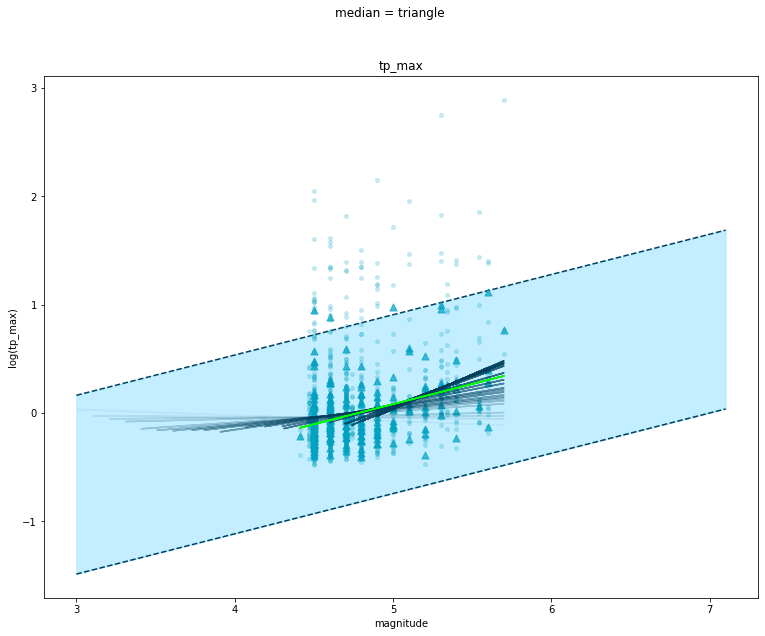

In [58]:

import matplotlib.pyplot as plt
cs = ['#00a1c1']
fig, axs = plt.subplots(1,1, figsize=(12.8,9.6))
y_aves_tp = []
y_aves_tc = []
x_aves_tp = []
x_aves_tc = []
count = 1
eq_count = 0
for mag_lim in np.arange(3, 5, 0.1):
    #print(mag_lim)
    y_aves_tp = []
    y_aves_tc = []
    x_aves_tp = []
    x_aves_tc = []
    for i  in range(0, len(list_mags)):
        if list_mags[i] > mag_lim and list_mags[i]<5.8:
            mean_tp = np.mean(list_tpmax[i]) 
            std_tp = np.std(list_tpmax[i]) 
            y_tp = [] 
            print(len(list_tpmax[i]))
            for j in list_tpmax[i]: 
                if j > mean_tp-2*std_tp and j < mean_tp + 2*std_tp:# and j < 100: 
                    y_tp.append(math.log(j, 10)) 
            x_tp = np.zeros(len(y_tp))  
            x_tp = x_tp + list_mags[i]  

            mean_tc = np.mean(list_tc[i]) 
            std_tc = np.std(list_tc[i]) 
            y_tc = [] 
            for k in list_tc[i]: 
                if k > mean_tc-2*std_tc and k < mean_tc + 2*std_tc:# and k < 100: 
                    y_tc.append(math.log(k, 10)) 
            x_tc = np.zeros(len(y_tc))  
            x_tc = x_tc + list_mags[i]
            c = 0
            if str(mag_lim) == str(4.4):# or mag_lim == 3:
                #print('in if')
                if len(x_tp)>0: # or len(x_tc)>0:
                    if np.median(y_tp):
                        axs.scatter(x_tp, y_tp, s = 15, alpha = 0.2, c = cs[c], marker = 'o', zorder =3) 
                    #axs[0].scatter(list_mags[i], np.mean(y_tp), s = 50, c = cs[c], marker = 'o')
                        axs.scatter(list_mags[i], np.median(y_tp), s = 50, c = cs[c], marker = '^', zorder =4, alpha = 0.7)
                    #axs[1].scatter(x_tc, y_tc, s = 15, alpha = 0.3, c = cs[c], marker = '^', zorder =3) 
                    #axs[1].scatter(list_mags[i], np.median(y_tc), s = 50, c = cs[c], marker = '^', zorder =4)
                    #axs[1].scatter(list_mags[i], np.mean(y_tc), s = 50, c = cs[c], marker = 'o')
                    #FOR CURVE FITTING
            if math.isnan(np.median(y_tp))==False:
                if np.median(y_tp):
                    y_aves_tp.append(np.median(y_tp))
                    x_aves_tp.append(list_mags[i])
            if math.isnan(np.median(y_tc))==False:
                y_aves_tc.append(np.median(y_tc))
                x_aves_tc.append(list_mags[i])
    popt, pcov = curve_fit(model_function_2, x_aves_tp, y_aves_tp)
    print(len(x_tp), mag_lim, popt)
    axs.plot(np.array(x_aves_tp), model_function_2(np.array(x_aves_tp), *popt), color = '#003f5c', alpha = count/21, zorder =10)
    if str(mag_lim) == str(4.4):
        popt, pcov = curve_fit(model_function_2, x_aves_tp, y_aves_tp, absolute_sigma = True)
        axs.plot(np.array(x_aves_tp), model_function_2(np.array(x_aves_tp), *popt), color='lime', zorder =100)
        popt_final, pcov_final = popt, pcov
        print(x_aves_tp)
        print(y_aves_tp)
        print(len(x_aves_tp), len(y_aves_tp))
        # add 2 * std banding

        perr = np.sqrt(np.diag(pcov))
        print(popt, perr)
        x_me = np.arange(3, 7.2, 0.1)
        x_lower_me = x_me - perr[1]*2
        x_upper_me =  x_me + perr[1]*2
        y_me = popt[0]*x+popt[1]
        y_lower_me = popt[0]*x_lower-popt[1]
        y_upper_me = popt[0]*x_upper-popt[1]
        #axs[0].plot(x, y_me, color = '')
        axs.fill_between(x_me, model_function_2(np.array(x_lower_me), *popt), model_function_2(np.array(x_upper_me), *popt), color = '#8adfff', alpha = 0.52, zorder =1)
        axs.plot(x_me, model_function_2(np.array(x_lower_me), *popt), color = '#003f5c', linestyle = '--', zorder =2)
        axs.plot(x_me, model_function_2(np.array(x_upper_me), *popt), color = '#003f5c', linestyle = '--', zorder =2)
            # add 2 * std banding
    #axs[0].set_ylim([0.2,2])
    #axs[0].set_yscale('log')
    #axs[1].set_yscale('log')
    count += 1
#x = np.arange(3, 7.2, 0.1)
#y = 0.14*x-0.83
#axs.plot(x, y, color = '#2a83ab', zorder =12)
axs.set_xlabel("magnitude") 
#axs[1].set_xlabel("magnitude") 
axs.set_ylabel("log(tp_max)") 
#axs[1].set_ylabel("tc")
axs.set_title("tp_max") 
#axs[1].set_title("tc") 
fig.suptitle("median = triangle")
#axs.set_ylim(-1, 1)

In [46]:
eq_count = 0
for i  in range(0, len(list_mags)):
    if list_mags[i] > mag_lim and list_mags[i]<5.8:
        eq_count += 1
print(eq_count)

144


In [47]:
'''axs.scatter(m_olsen, tp_olsen, c = 'coral', marker = 'x', zorder = 20)
popt, pcov = curve_fit(model_function_2, m_olsen, tp_olsen, absolute_sigma = True)
axs.plot(np.array(m_olsen), model_function_2(np.array(m_olsen), *popt), color = 'k', zorder =10)'''

"axs.scatter(m_olsen, tp_olsen, c = 'coral', marker = 'x', zorder = 20)\npopt, pcov = curve_fit(model_function_2, m_olsen, tp_olsen, absolute_sigma = True)\naxs.plot(np.array(m_olsen), model_function_2(np.array(m_olsen), *popt), color = 'k', zorder =10)"

In [48]:
%%capture
#plot line of best fit from olsen and allen 2005
x = np.arange(3, 7.2, 0.1)
x_lower = x - 0.54*2
x_upper =  x + 0.54*2
y = 0.14*x-0.83
y_lower = 0.14*x_lower-0.83
y_upper = 0.14*x_upper-0.83
axs.plot(x, y, color = 'indianred', zorder =2, linestyle=':')
axs.fill_between(x, y_lower, y_upper, alpha = 0.15, color='indianred', zorder =1)
axs.plot(x, y_lower, color = 'indianred', linestyle = ':', zorder =2)
axs.plot(x, y_upper, color = 'indianred', linestyle = ':', zorder =2)

use scipy curve_fit to add my own line of best fit

In [49]:
popt

array([ 0.55723295, -2.72105359])

In [50]:
'''#%%capture
# plot my own line of best fit
popt, pcov = curve_fit(model_function_2, x_aves_tp, y_aves_tp, absolute_sigma = True)
#axs.plot(np.array(x_aves_tp), model_function_2(np.array(x_aves_tp), *popt), color='#003f5c', zorder =2)

# add 2 * std banding

perr = np.sqrt(np.diag(pcov))
x_me = np.arange(3, 7.2, 0.1)
x_lower_me = x_me - perr[1]*2
x_upper_me =  x_me + perr[1]*2
y_me = popt[0]*x+popt[1]
y_lower_me = popt[0]*x_lower-popt[1]
y_upper_me = popt[0]*x_upper-popt[1]
#axs[0].plot(x, y_me, color = '')
axs.fill_between(x_me, model_function_2(np.array(x_lower_me), *popt), model_function_2(np.array(x_upper_me), *popt), color = '#8adfff', alpha = 0.52, zorder =1)
axs.plot(x_me, model_function_2(np.array(x_lower_me), *popt), color = '#003f5c', linestyle = '--', zorder =2)
axs.plot(x_me, model_function_2(np.array(x_upper_me), *popt), color = '#003f5c', linestyle = '--', zorder =2)'''

"#%%capture\n# plot my own line of best fit\npopt, pcov = curve_fit(model_function_2, x_aves_tp, y_aves_tp, absolute_sigma = True)\n#axs.plot(np.array(x_aves_tp), model_function_2(np.array(x_aves_tp), *popt), color='#003f5c', zorder =2)\n\n# add 2 * std banding\n\nperr = np.sqrt(np.diag(pcov))\nx_me = np.arange(3, 7.2, 0.1)\nx_lower_me = x_me - perr[1]*2\nx_upper_me =  x_me + perr[1]*2\ny_me = popt[0]*x+popt[1]\ny_lower_me = popt[0]*x_lower-popt[1]\ny_upper_me = popt[0]*x_upper-popt[1]\n#axs[0].plot(x, y_me, color = '')\naxs.fill_between(x_me, model_function_2(np.array(x_lower_me), *popt), model_function_2(np.array(x_upper_me), *popt), color = '#8adfff', alpha = 0.52, zorder =1)\naxs.plot(x_me, model_function_2(np.array(x_lower_me), *popt), color = '#003f5c', linestyle = '--', zorder =2)\naxs.plot(x_me, model_function_2(np.array(x_upper_me), *popt), color = '#003f5c', linestyle = '--', zorder =2)"

In [51]:
x_lan = np.arange(5, 6, 0.1)
y_lan = 0.34*x_lan-1.8
axs.plot(x_lan, y_lan, color = 'magenta', zorder =100)

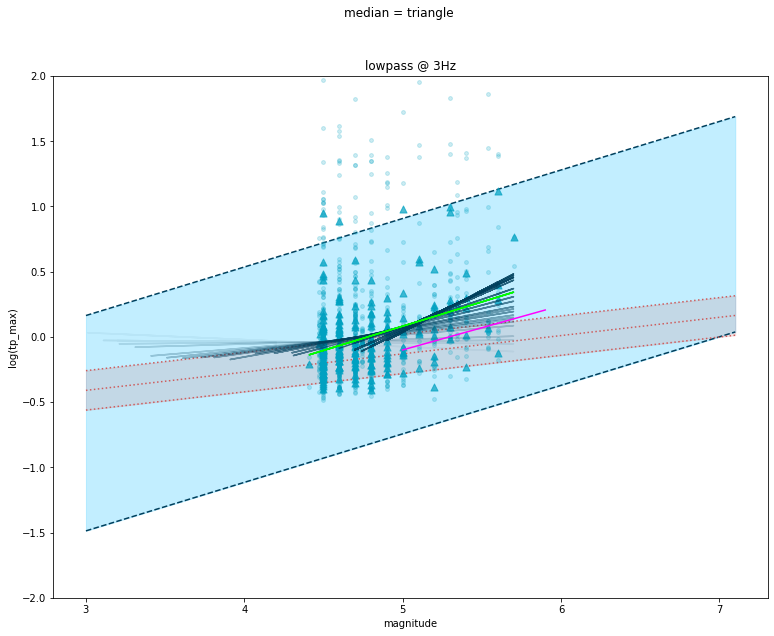

In [55]:
axs.set_ylim([-2,2])
axs.set_title('lowpass @ 3Hz')
fig # show updated figure

## published relationships

In [29]:
%%capture
fig, axs = plt.subplots(1,1, figsize=(12.8,9.6))

plot olsen and allen data

In [30]:
%%capture
axs.scatter(m_olsen, tp_olsen, c = 'grey', marker = 'x', zorder = 20, label = 'olson data')

plot published line of best fit

In [31]:
%%capture
#plot line of best fit from olsen and allen 2005
x = np.arange(3, 8.3, 0.1)
x_lower = x - 0.54*2
x_upper =  x + 0.54*2
y = 0.14*x-0.83
y_lower = 0.14*x_lower-0.83
y_upper = 0.14*x_upper-0.83
axs.plot(x, y, color = 'indianred', zorder =2, label = 'olson', linestyle = ':')
axs.fill_between(x, y_lower, y_upper, alpha = 0.15, color='indianred', zorder =1, label='olson error')
axs.plot(x, y_lower, color = 'indianred', linestyle = ':', zorder =2)
axs.plot(x, y_upper, color = 'indianred', linestyle = ':', zorder =2)


using model_function_2, calculate line of best fit with olsen and allen data

In [32]:
%%capture
popt, pcov = curve_fit(model_function_2, m_olsen, tp_olsen, absolute_sigma = True)
axs.plot(np.array(m_olsen), model_function_2(np.array(m_olsen), *popt), color = 'coral', zorder =10, label='recalc olson', linestyle = '--')
perr = np.sqrt(np.diag(pcov))

x_olsen_recalc = np.arange(3, 8.3, 0.1)
x_lower_olsen_recalc = x_olsen_recalc - perr[1]*2
x_upper_olsen_recalc =  x_olsen_recalc + perr[1]*2
y_olsen_recalc = popt[0]*x+popt[1]
y_lower_olsen_recalc = popt[0]*x_lower+popt[1]
y_upper_olsen_recalc = popt[0]*x_upper+popt[1]
#axs[0].plot(x, y_me, color = '')
axs.fill_between(x_olsen_recalc, model_function_2(np.array(x_lower_olsen_recalc), *popt), model_function_2(np.array(x_upper_olsen_recalc), *popt), color = 'coral', alpha = 0.15, zorder =1, label='recalc olson error')
axs.plot(x_olsen_recalc, model_function_2(np.array(x_lower_olsen_recalc), *popt), color = 'coral', linestyle = '--', zorder =2)
axs.plot(x_olsen_recalc, model_function_2(np.array(x_upper_olsen_recalc), *popt), color = 'coral', linestyle = '--', zorder =2)



In [33]:
popt

array([ 0.14203559, -0.80358558])

add line of best fit from lancieri et al

In [34]:
x_lan = np.arange(5, 6, 0.1)
y_lan = 0.34*x_lan-1.8
axs.plot(x_lan, y_lan, color = 'rebeccapurple', zorder =1, label='lancieri')

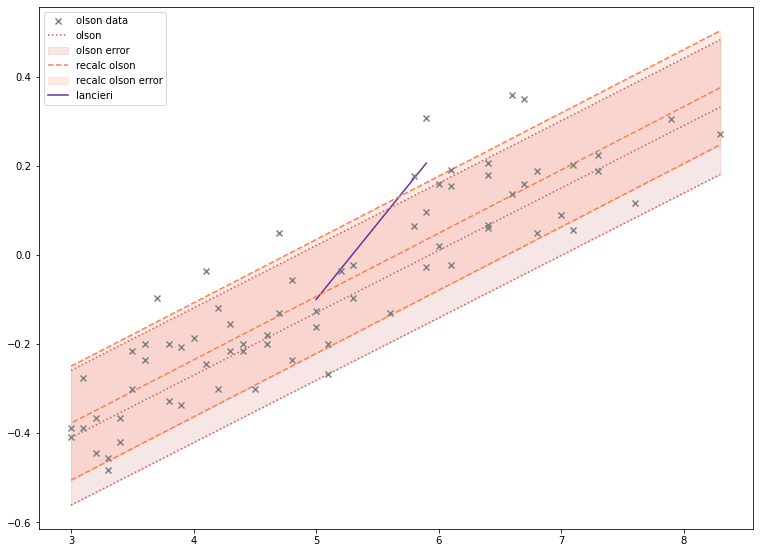

In [35]:
axs.legend()
fig